In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank Loan Status Dataset/credit_train.csv',encoding='utf-8')
data_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [26]:
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank Loan Status Dataset/credit_test.csv',encoding='utf-8')
data_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [27]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [7]:
data_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


In [9]:
data_test.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,1077.991520,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,1477.467761,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,706.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,725.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,741.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [10]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,10000.0,1.160380e+07,3.160010e+07,19470.0,178948.0000,309276.000,5.157075e+05,1.000000e+08
Credit Score,8019.0,1.077992e+03,1.477468e+03,585.0,706.0000,725.000,7.410000e+02,7.510000e+03
Annual Income,8019.0,1.369106e+06,8.687557e+05,81092.0,848340.5000,1168272.000,1.664390e+06,1.781535e+07
Monthly Debt,10000.0,1.842967e+04,1.239996e+04,0.0,10202.8575,16052.055,2.388134e+04,2.290579e+05
Years of Credit History,10000.0,1.823593e+01,7.018356e+00,3.8,13.6000,17.000,2.170000e+01,6.250000e+01
Months since last delinquent,4694.0,3.496464e+01,2.164029e+01,0.0,17.0000,32.000,5.000000e+01,1.310000e+02
Number of Open Accounts,10000.0,1.108410e+01,5.023380e+00,1.0,7.0000,10.000,1.400000e+01,5.500000e+01
Number of Credit Problems,10000.0,1.655000e-01,5.009340e-01,0.0,0.0000,0.000,0.000000e+00,1.000000e+01
Current Credit Balance,10000.0,2.907301e+05,3.881687e+05,0.0,108651.5000,207518.000,3.624630e+05,1.623744e+07
Maximum Open Credit,10000.0,6.871308e+05,1.861394e+06,0.0,270600.0000,462605.000,7.861150e+05,1.459073e+08


In [11]:
data_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [12]:
data_test.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [13]:
def calculate_null_values(dataframe):
    d_frame = dataframe
    # get the sum of the null value of  each column 
    d_frame_null_values = pd.DataFrame(dataframe.isna().sum())
    # reset the dataframe index
    d_frame_null_values.reset_index(inplace=True)
    # add colume header to the dataframe
    d_frame_null_values.columns = ['Field_names', 'Null_value']
    #calculate the percentage of null or missing values 
    d_frame_null_value_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_value_percentage.reset_index(inplace=True)
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_values['Null_values_percentage'] = d_frame_null_value_percentage[0]
    return d_frame_null_values

In [14]:
def calculate_null_valuess(dataframe):
    d_frame = dataframe
   # get the sum of the null value of  each column 
    d_frame_null_values = pd.DataFrame(dataframe.isna().sum())
  # reset the dataframe index
    d_frame_null_values.reset_index(inplace=True)
  # add colume header to the dataframe
    d_frame_null_values.columns=['Field_names','Null_value']
  #calculate the percentage of null or missing values 
    d_frame_null_value_percentage = dataframe.isnull().sum() / len(dataframe) * 100
    d_frame_null_value_percentage = pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_value_percentage.reset_index(inplace=True)
    d_frame_null_value_percentage=pd.DataFrame(d_frame_null_value_percentage)
    d_frame_null_values['Null_values_percentage'] =d_frame_null_value_percentage[0]
    return d_frame_null_values

In [15]:
data_train.shape

(100514, 19)

In [16]:
data_test.shape

(10353, 18)

In [17]:
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,514,0.511372
1,Customer ID,514,0.511372
2,Loan Status,514,0.511372
3,Current Loan Amount,514,0.511372
4,Term,514,0.511372
5,Credit Score,19668,19.567423
6,Annual Income,19668,19.567423
7,Years in current job,4736,4.711781
8,Home Ownership,514,0.511372
9,Purpose,514,0.511372


In [18]:
calculate_null_valuess(data_test)

,Field_names,Null_value,Null_values_percentage
0,Loan ID,353,3.409640
1,Customer ID,353,3.409640
2,Current Loan Amount,353,3.409640
3,Term,353,3.409640
4,Credit Score,2334,22.544190
5,Annual Income,2334,22.544190
6,Years in current job,780,7.534048
7,Home Ownership,353,3.409640
8,Purpose,353,3.409640
9,Monthly Debt,353,3.409640


<Axes: ylabel='count'>

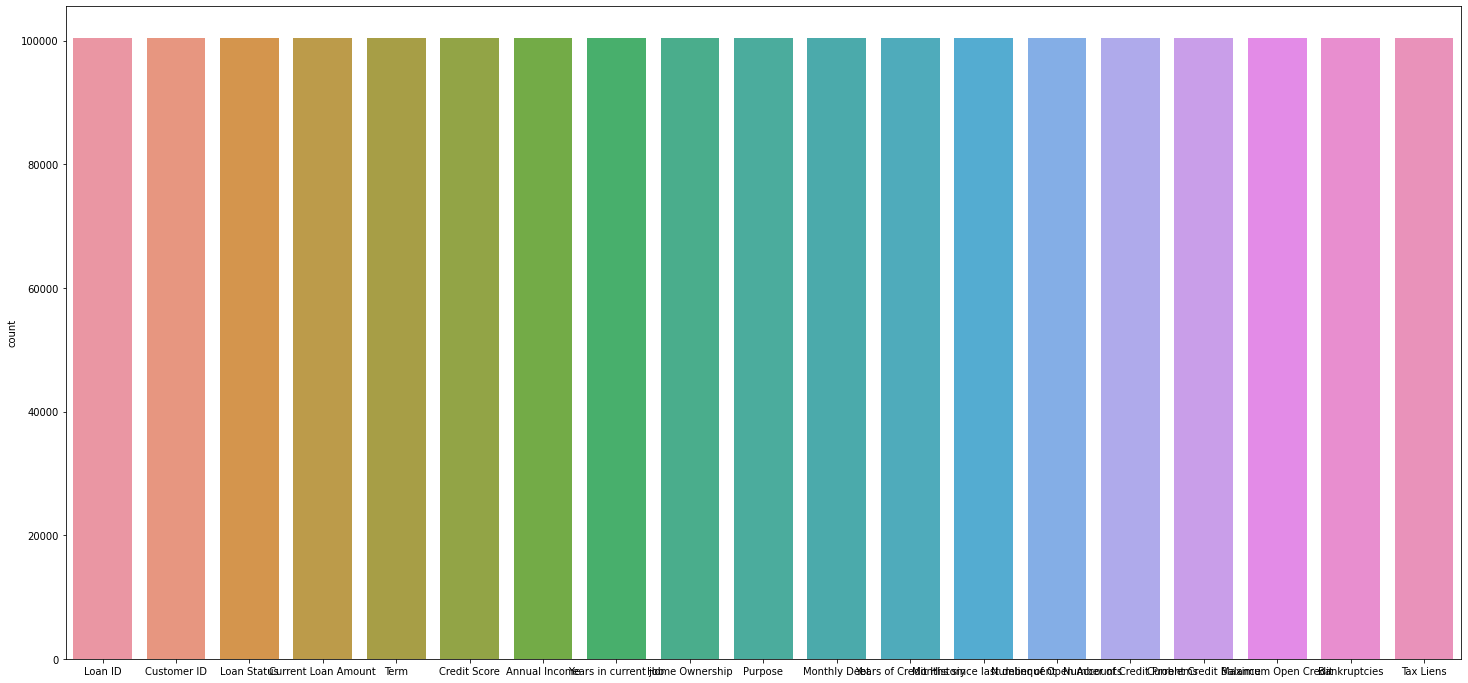

In [19]:
plt.figure(figsize=(25,12))
sns.countplot(data_train.isnull())

<Axes: >

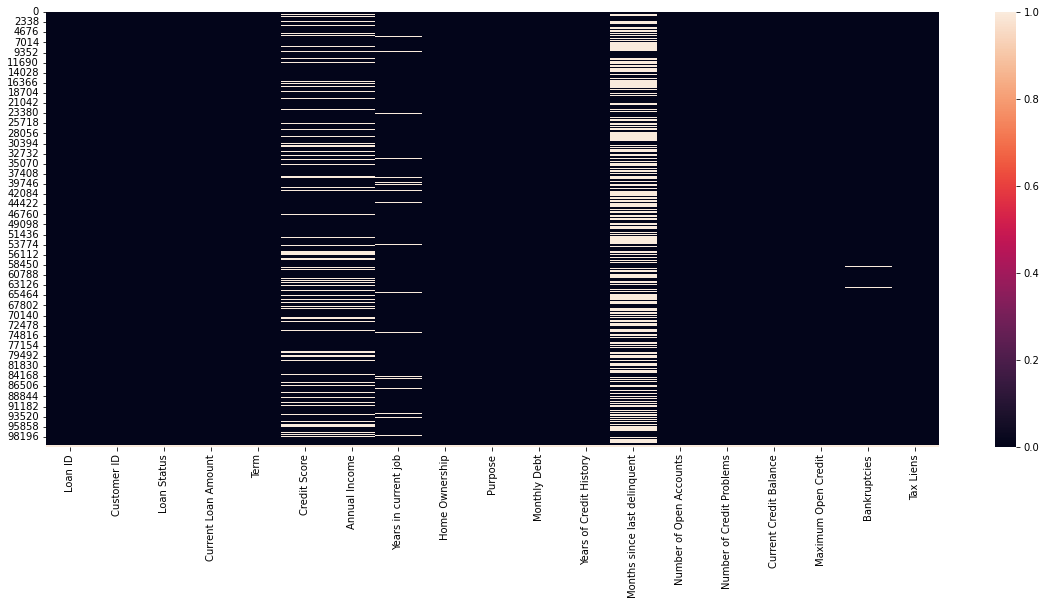

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(data_train.isnull())

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: ylabel='Count'>

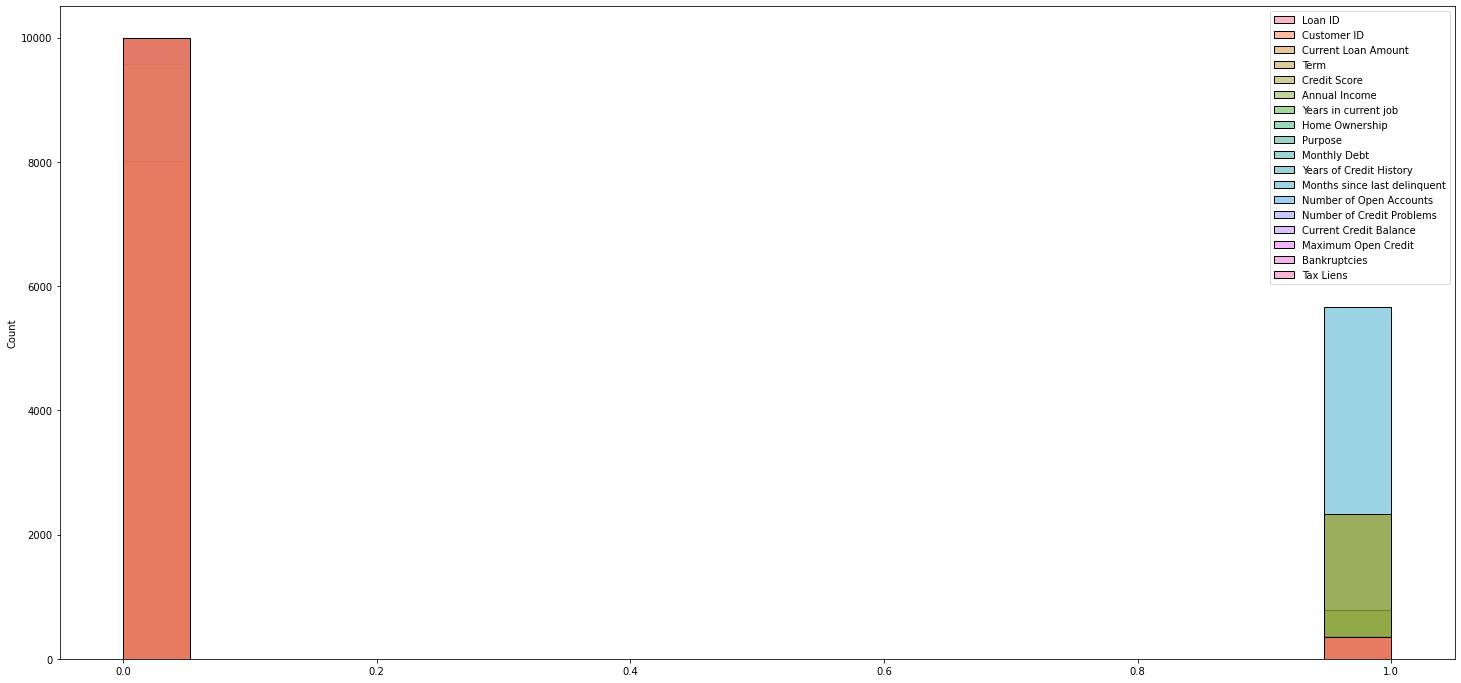

In [21]:
plt.figure(figsize=(25,12))
sns.histplot(data_test.isnull())

In [ ]:
#Data preprocessing


In [28]:
data_train = data_train.drop(labels=['Loan ID' , 'Customer ID'] , axis = 1)

In [29]:
data_test = data_test.drop(labels=['Loan ID','Customer ID'] , axis =1)

In [30]:
data_train.shape

(100514, 17)

In [31]:
data_test.shape

(10353, 16)

In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  object 
 1   Current Loan Amount           100000 non-null  float64
 2   Term                          100000 non-null  object 
 3   Credit Score                  80846 non-null   float64
 4   Annual Income                 80846 non-null   float64
 5   Years in current job          95778 non-null   object 
 6   Home Ownership                100000 non-null  object 
 7   Purpose                       100000 non-null  object 
 8   Monthly Debt                  100000 non-null  float64
 9   Years of Credit History       100000 non-null  float64
 10  Months since last delinquent  46859 non-null   float64
 11  Number of Open Accounts       100000 non-null  float64
 12  Number of Credit Problems     100000 non-nul

In [33]:
#Dealing with missing values
# about 50 % of it is missing 
data_train.drop(columns = 'Months since last delinquent', axis=1, inplace=True)
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan Status,514,0.511372
1,Current Loan Amount,514,0.511372
2,Term,514,0.511372
3,Credit Score,19668,19.567423
4,Annual Income,19668,19.567423
5,Years in current job,4736,4.711781
6,Home Ownership,514,0.511372
7,Purpose,514,0.511372
8,Monthly Debt,514,0.511372
9,Years of Credit History,514,0.511372


In [34]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           10000 non-null  float64
 1   Term                          10000 non-null  object 
 2   Credit Score                  8019 non-null   float64
 3   Annual Income                 8019 non-null   float64
 4   Years in current job          9573 non-null   object 
 5   Home Ownership                10000 non-null  object 
 6   Purpose                       10000 non-null  object 
 7   Monthly Debt                  10000 non-null  float64
 8   Years of Credit History       10000 non-null  float64
 9   Months since last delinquent  4694 non-null   float64
 10  Number of Open Accounts       10000 non-null  float64
 11  Number of Credit Problems     10000 non-null  float64
 12  Current Credit Balance        10000 non-null  float64
 13  M

In [35]:
data_test.drop(columns =  ['Months since last delinquent'] , axis=1 , inplace=True)
calculate_null_valuess(data_test)

,Field_names,Null_value,Null_values_percentage
0,Current Loan Amount,353,3.409640
1,Term,353,3.409640
2,Credit Score,2334,22.544190
3,Annual Income,2334,22.544190
4,Years in current job,780,7.534048
5,Home Ownership,353,3.409640
6,Purpose,353,3.409640
7,Monthly Debt,353,3.409640
8,Years of Credit History,353,3.409640
9,Number of Open Accounts,353,3.409640


In [36]:
data_train[data_train['Years of Credit History'].isnull() == True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
## We note that the last 514 values are misiing values 
data_train.drop(data_train.tail(514).index, inplace=True)
# drop last 514 rows
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan Status,0,0.000
1,Current Loan Amount,0,0.000
2,Term,0,0.000
3,Credit Score,19154,19.154
4,Annual Income,19154,19.154
5,Years in current job,4222,4.222
6,Home Ownership,0,0.000
7,Purpose,0,0.000
8,Monthly Debt,0,0.000
9,Years of Credit History,0,0.000


In [38]:
data_test.drop(data_test.tail(353).index , inplace=True)
calculate_null_valuess(data_test)

,Field_names,Null_value,Null_values_percentage
0,Current Loan Amount,0,0.00
1,Term,0,0.00
2,Credit Score,1981,19.81
3,Annual Income,1981,19.81
4,Years in current job,427,4.27
5,Home Ownership,0,0.00
6,Purpose,0,0.00
7,Monthly Debt,0,0.00
8,Years of Credit History,0,0.00
9,Number of Open Accounts,0,0.00


In [ ]:
#for i in data_train['Maximum Open Credit'][data_train['Maximum Open Credit'].isnull() == True].index:
#    data_train.drop(labels=i, inplace=True)

In [39]:
data_test.drop(columns =  ['Credit Score'] , axis=1 , inplace=True)
data_test.drop(columns =  ['Annual Income'] , axis=1 , inplace=True)
data_test.drop(columns =  ['Years in current job'] , axis=1 , inplace=True)
data_test.drop(columns =  ['Bankruptcies'] , axis=1 , inplace=True)
data_test.drop(columns =  ['Tax Liens'] , axis=1 , inplace=True)
calculate_null_valuess(data_test)

,Field_names,Null_value,Null_values_percentage
0,Current Loan Amount,0,0.0
1,Term,0,0.0
2,Home Ownership,0,0.0
3,Purpose,0,0.0
4,Monthly Debt,0,0.0
5,Years of Credit History,0,0.0
6,Number of Open Accounts,0,0.0
7,Number of Credit Problems,0,0.0
8,Current Credit Balance,0,0.0
9,Maximum Open Credit,0,0.0


In [40]:
data_train.drop(columns= ['Credit Score'],axis=1 , inplace=True)
data_train.drop(columns=['Annual Income'],axis=1 ,inplace=True)
data_train.drop(columns=['Years in current job'],axis=1 ,inplace=True)
data_train.drop(columns=['Maximum Open Credit'],axis=1,inplace=True)
data_train.drop(columns=['Bankruptcies'],axis=1 ,inplace=True)
data_train.drop(columns=['Tax Liens'],axis=1 , inplace=True)
calculate_null_values(data_train)

,Field_names,Null_value,Null_values_percentage
0,Loan Status,0,0.0
1,Current Loan Amount,0,0.0
2,Term,0,0.0
3,Home Ownership,0,0.0
4,Purpose,0,0.0
5,Monthly Debt,0,0.0
6,Years of Credit History,0,0.0
7,Number of Open Accounts,0,0.0
8,Number of Credit Problems,0,0.0
9,Current Credit Balance,0,0.0


In [41]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Home Ownership             100000 non-null  object 
 4   Purpose                    100000 non-null  object 
 5   Monthly Debt               100000 non-null  float64
 6   Years of Credit History    100000 non-null  float64
 7   Number of Open Accounts    100000 non-null  float64
 8   Number of Credit Problems  100000 non-null  float64
 9   Current Credit Balance     100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [42]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Loan Amount        10000 non-null  float64
 1   Term                       10000 non-null  object 
 2   Home Ownership             10000 non-null  object 
 3   Purpose                    10000 non-null  object 
 4   Monthly Debt               10000 non-null  float64
 5   Years of Credit History    10000 non-null  float64
 6   Number of Open Accounts    10000 non-null  float64
 7   Number of Credit Problems  10000 non-null  float64
 8   Current Credit Balance     10000 non-null  float64
 9   Maximum Open Credit        10000 non-null  float64
dtypes: float64(7), object(3)
memory usage: 781.4+ KB


In [43]:
data_train.duplicated().sum()

14422

In [44]:
data_train.drop_duplicates(inplace=True)

In [45]:
data_train.shape

(85578, 10)

In [46]:
data_test.duplicated().sum()

0

In [47]:
data_test.drop_duplicates(inplace=True)

In [48]:
data_test.shape

(10000, 10)

In [49]:
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [50]:
v_counts(data_train)

Fully Paid     62939
Charged Off    22639
Name: Loan Status, dtype: int64
_____________________________________________________________________________
99999999.0    11484
223322.0         23
214962.0         22
220550.0         21
217668.0         21
              ...  
501248.0          1
728244.0          1
462264.0          1
580580.0          1
274076.0          1
Name: Current Loan Amount, Length: 22004, dtype: int64
_____________________________________________________________________________
Short Term    63546
Long Term     22032
Name: Term, dtype: int64
_____________________________________________________________________________
Home Mortgage    41521
Rent             36085
Own Home          7797
HaveMortgage       175
Name: Home Ownership, dtype: int64
_____________________________________________________________________________
Debt Consolidation      67626
Home Improvements        4982
other                    4901
Other                    2759
Business Loan            12

In [51]:
v_counts(data_test)

99999999.0    1133
172436.0         7
221892.0         6
154704.0         6
442596.0         6
              ... 
108218.0         1
442068.0         1
622182.0         1
117392.0         1
223212.0         1
Name: Current Loan Amount, Length: 6786, dtype: int64
_____________________________________________________________________________
Short Term    7295
Long Term     2705
Name: Term, dtype: int64
_____________________________________________________________________________
Home Mortgage    4867
Rent             4203
Own Home          914
HaveMortgage       16
Name: Home Ownership, dtype: int64
_____________________________________________________________________________
Debt Consolidation      7878
Home Improvements        593
other                    561
Other                    308
Business Loan            163
Buy a Car                142
Medical Bills            113
Buy House                 70
major_purchase            52
Take a Trip               44
small_business            3

In [52]:
data_train.Purpose = data_train.Purpose.str.replace('other','Other')

In [53]:
data_test.Purpose =data_test.Purpose.str.replace('other' , 'Other')

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
l_encoder = LabelEncoder()

In [56]:
data_train['Loan Status'] = l_encoder.fit_transform(data_train['Loan Status'])
data_train['Term'] = l_encoder.fit_transform(data_train['Term'])
#data_train['Years in current job'] = l_encoder.fit_transform(data_train['Years in current job'])
data_train['Home Ownership'] = l_encoder.fit_transform(data_train['Home Ownership'])
data_train['Purpose'] = l_encoder.fit_transform(data_train['Purpose'])

In [57]:
from ssl import Purpose
data_test['Term']=l_encoder.fit_transform(data_test['Term'])
data_test['Home Ownership']=l_encoder.fit_transform(data_test['Home Ownership'])
data_test['Purpose']=l_encoder.fit_transform(data_test['Purpose'])

In [ ]:
#Split the data

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x= data_train.drop(['Loan Status' ] , axis=1).values
y = data_train['Loan Status'].values

In [60]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state= 42)

In [61]:
print(x_train.shape , x_test.shape)

(64183, 9) (21395, 9)


In [62]:
x_= data_train.drop(['Term' ] , axis=1).values
y_ = data_train['Term'].values

In [63]:
x_train_ , x_test_ , y_train_ , y_test_ = train_test_split(x_ , y_ , test_size= 0.25 , random_state= 42)

In [64]:
print(x_train_.shape , x_test_.shape)

(64183, 9) (21395, 9)


In [65]:
print(x_train_.shape ,x_train.shape)

(64183, 9) (64183, 9)


In [174]:
print(x_test_.shape , x_test.shape)

(21395, 9) (21395, 9)


In [67]:
#Data Scalling
from sklearn.preprocessing import StandardScaler

In [68]:
scalar = StandardScaler()

In [69]:
x_train=scalar.fit_transform(x_train)

In [70]:
x_test = scalar.fit_transform(x_test)

In [71]:
x_test_=scalar.fit_transform(x_test_)

In [72]:
x_train_ =scalar.fit_transform(x_train_)

In [173]:
x_train.shape , x_train_.shape

((64183, 9), (64183, 9))

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lg = LogisticRegression(max_iter = 500)

In [76]:
lg.fit(x_train , y_train)

LogisticRegression(max_iter=500)

In [77]:
lg.fit(x_train_ , y_train_)

LogisticRegression(max_iter=500)

In [78]:
lg.score(x_train , y_train)

0.7282302167240546

In [79]:
lg.score(x_test ,y_test)

0.7307782192100958

In [80]:
lg.intercept_

array([1.12299139])

In [81]:
lg.coef_

array([[ 0.34602682,  0.03175593,  0.21213434,  0.09205264, -0.24979969,
         0.00427074, -0.02326738,  0.04132695, -0.05983751]])

In [82]:
lg.score(x_train_ , y_train_)

0.7415359207266722

In [83]:
lg.score(x_test_ , y_test_)

0.7419957934096751

In [84]:
lg.intercept_

array([1.12299139])

In [85]:
lg.coef_

array([[ 0.34602682,  0.03175593,  0.21213434,  0.09205264, -0.24979969,
         0.00427074, -0.02326738,  0.04132695, -0.05983751]])

In [86]:
y_predict = lg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_predict" : y_predict})
df

,Y_test,Y_predict
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
21390,1,1
21391,0,1
21392,1,1
21393,1,1


In [89]:
y_predict = lg.predict(x_test_)
dd = pd.DataFrame({"Y_test": y_test , "Y_predict" : y_predict})
dd

,Y_test,Y_predict
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
21390,1,1
21391,0,1
21392,1,1
21393,1,1


<Axes: ylabel='count'>

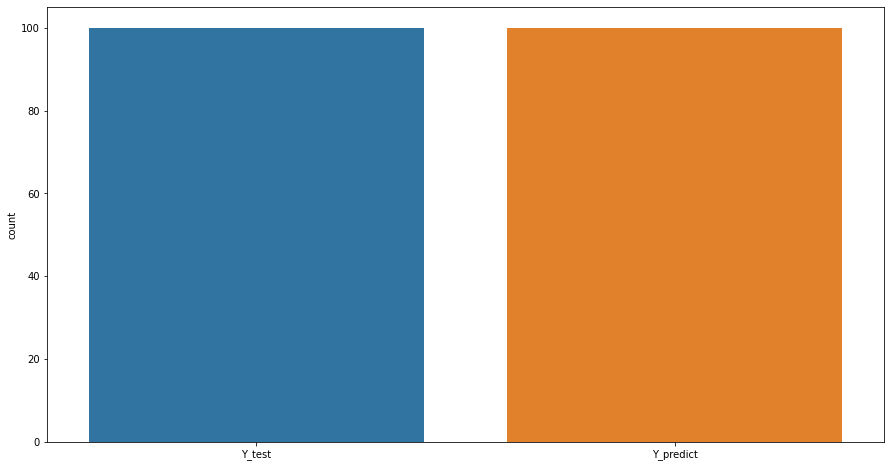

In [88]:
plt.figure(figsize=(15,8))
sns.countplot(df[:100])

<Axes: ylabel='count'>

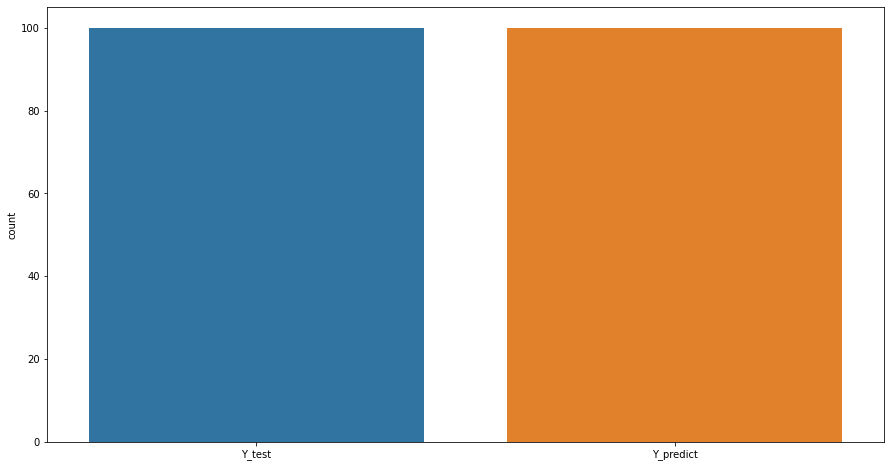

In [90]:
plt.figure(figsize=(15,8))
sns.countplot(dd[:100])

In [93]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier

In [94]:

knn = KNeighborsClassifier(n_neighbors=5)


In [95]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [96]:
knn.fit(x_train_ , y_train_)

KNeighborsClassifier()

In [97]:
knn.score(x_train , y_train )

0.6900425346275494

In [98]:
knn.score(x_test , y_test)

0.6788034587520448

In [99]:
knn.score(x_train_ ,y_train_)

0.7889472290170294

In [100]:
knn.score(x_test_ , y_test_)

0.707548492638467

In [101]:
y_predict = knn.predict(x_test)
df = pd.DataFrame({"Y_test" : y_test , "Y_predict" : y_predict})
df.head(10)

,Y_test,Y_predict
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
5,1,1
6,0,1
7,1,1
8,0,1
9,1,1


<Axes: ylabel='count'>

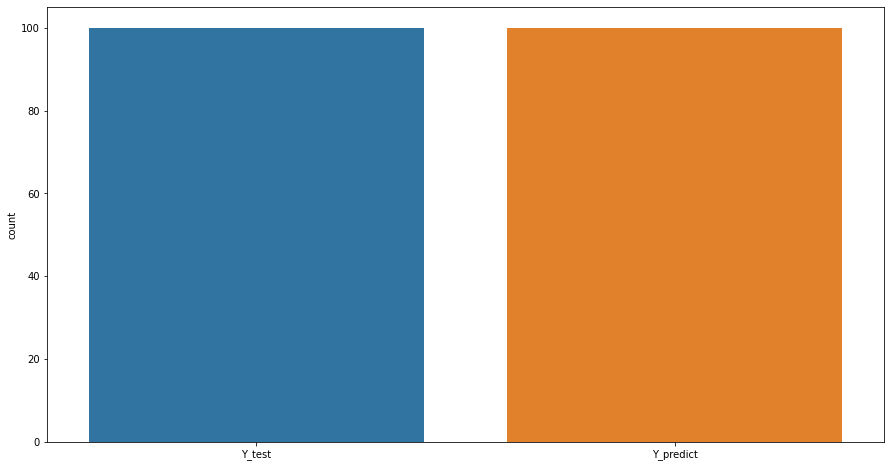

In [102]:
plt.figure(figsize=(15,8))
sns.countplot(df[:100])

In [104]:
y_predict = knn.predict(x_test)
dt = pd.DataFrame({"Y_test" : y_test , "Y_predict" : y_predict})
dt.head(10)

,Y_test,Y_predict
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
5,1,1
6,0,1
7,1,1
8,0,1
9,1,1


<Axes: ylabel='count'>

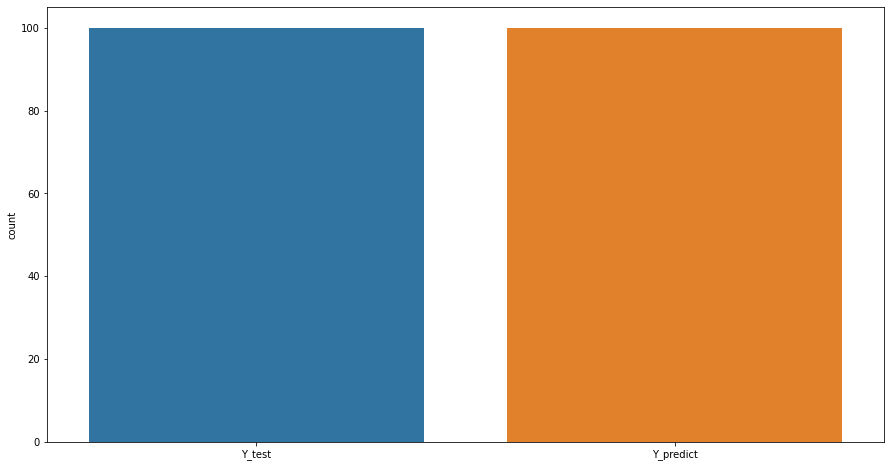

In [105]:
plt.figure(figsize=(15,8))
sns.countplot(dt[:100])

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
gnb = GaussianNB()

In [111]:
gnb.fit(x_train , y_train)

GaussianNB()

In [112]:
gnb.score(x_train ,y_train)

0.4001682688562392

In [115]:
gnb.score(x_test ,y_test)

0.40537508763729846

In [113]:
gnb.score(x_train_ ,y_train_)

0.7423928454575199

In [114]:
gnb.score(x_test_ ,y_test_)

0.7430240710446366

In [116]:
y_predict= gnb.predict(x_test)
gnb = pd.DataFrame({"Y_test": y_test , "Y_predict" : y_predict})
gnb.head(10)

,Y_test,Y_predict
0,0,0
1,1,0
2,1,0
3,1,1
4,0,0
5,1,0
6,0,0
7,1,1
8,0,1
9,1,1


<Axes: ylabel='count'>

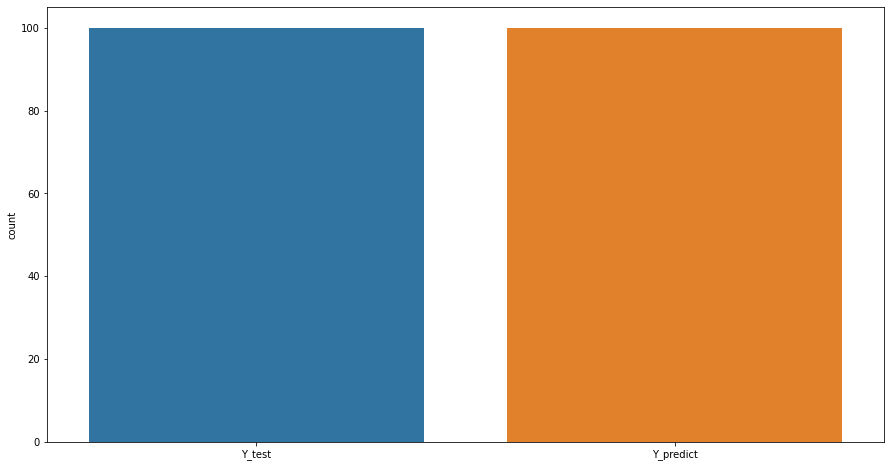

In [117]:
plt.figure(figsize=(15,8))
sns.countplot(dt[:100])

In [124]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [125]:
from imblearn.under_sampling import ClusterCentroids
undersampler = ClusterCentroids()
x= data_train.drop(['Loan Status' ] , axis=1).values
y = data_train['Loan Status'].values

In [129]:
#X_smote, y_smote = undersampler.fit_resample(x, y)

In [ ]:
#y_smote.value_counts()

In [ ]:
#y_smote.fit(x_train , y_train)

In [ ]:
#y_smote.score(x_train, y_train)

In [ ]:
#y_smote.score(x_test , y_test)

In [ ]:
#y_predict = y_smote.predict(x_test )
#df =pd.DataFrame({"Y_test" : y_test , "Y_predict" : y_predict})
#df.head(10)

In [163]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [165]:
# Load the iris dataset
iris = load_iris()
X=iris.data
y=iris.target

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [167]:
model=RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [169]:
score=model.score(X_train,y_train)
print("train score: {}".format(score))

train score: 0.9916666666666667


In [170]:
score=model.score(X_test,y_test)
print("train score: {}".format(score))

train score: 0.9666666666666667


In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
data_train = DecisionTreeClassifier(max_depth=4,max_features=7)

In [145]:
data_train.fit(x_train ,y_train)

DecisionTreeClassifier(max_depth=4, max_features=7)

In [148]:
data_train.score(x_train ,y_train)


0.7347740055778009

In [147]:
data_train.score(x_test , y_test)

0.7375087637298434

In [149]:
data_test =DecisionTreeClassifier(max_depth=4 ,max_features=7)


In [152]:
data_test.score(x_train_ , y_train_)


0.7596871445709923

In [153]:
data_test.score(x_test_ ,y_test_)

0.7634494040663706

In [130]:
from sklearn.metrics import r2_score

In [131]:
reg_score = r2_score(y_test , y_predict)
reg_score

-2.0715748770996254

In [132]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [133]:
mse = mean_squared_error (y_test , y_predict)
print (mse)

0.5946249123627015


In [134]:
mae = mean_absolute_error (y_test , y_predict)
print (mae)
mape = mean_absolute_percentage_error (y_test , y_predict)
print (mape)

0.5946249123627015
58307880195449.4


In [135]:
from sklearn.linear_model import Lasso

In [136]:
las = Lasso(alpha = 0.6)
las.fit(x_train , y_train)

Lasso(alpha=0.6)

In [137]:
print(las.score(x_train , y_train))
print( las.score(x_test , y_test))

0.0
-3.863277080284888e-05


In [155]:
las.score(x_train_  , y_train_)

-0.00030351907803272127

In [172]:
las.score(x_test_ , y_test_)

-0.00035646710702708084

In [138]:
import statsmodels.api as sm
from scipy import stats

In [139]:
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train , X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     645.3
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:56:45   Log-Likelihood:                -35810.
No. Observations:               64183   AIC:                         7.164e+04
Df Residuals:                   64173   BIC:                         7.173e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7348      0.002    440.308      0.0

In [140]:
from sklearn import svm

In [141]:
regr = svm.SVR()

In [142]:
regr.fit(x_train,y_train)

SVR()

In [157]:
regr.score(x_train,y_train)

-0.06757830764446182

In [158]:
regr.score(x_test , y_test)

-0.08887230818345304

In [160]:
regr.score(x_train_ , y_train_)



-0.13127040944965196

In [161]:
regr.score(x_test_ , y_test_)

-0.13057407635112406